In [12]:
from astroplan import FixedTarget, Observer
from astroplan.plots import plot_airmass, plot_finder_image
from astropy.time import Time
from astropy.coordinates import EarthLocation, SkyCoord
import astropy.units as u
from pytz import timezone
from astropy.io import ascii
from astropy.table import Column
from numpy import array
import matplotlib.pyplot as plt
from os.path import isdir
from shutil import rmtree
from os import mkdir

In [13]:
longitude = '+24d53m57s'
latitude = '+35d12m43s'
elevation = (1750.0*u.m)
pressure = 0.850*u.bar
humid = 0.50
temperature = 10.0*u.deg_C
tz = timezone('Europe/Athens')
filename = 'master.csv'
daytime = Time('2018-08-31 23:30:00')
subdir = 'Results'

In [14]:
if isdir(subdir):
    dummy = raw_input('I will delete everything in the entered directory. Press [enter] to confirm.')
    dummy = raw_input('I will DELETE EVERYTHING in the entered directory! Press [enter] to confirm.')
    rmtree(subdir)
mkdir(subdir)

I will delete everything in the entered directory. Press [enter] to confirm.
I will DELETE EVERYTHING in the entered directory! Press [enter] to confirm.


In [15]:
location = EarthLocation.from_geodetic(longitude, latitude, elevation)
observatory = Observer(name='Skinakas', location=location, pressure=pressure, relative_humidity=humid,
                       temperature=temperature, timezone=tz, description='Skinakas Observatory, 1.3m telescope, Crete, Greece')

In [16]:
objtab = ascii.read(filename)

rh = [str(e) for e in list(array(objtab['RAH']))]
rm = [str(e) for e in list(array(objtab['RAM']))]
rs = [str(e) for e in list(array(objtab['RAS']))]
dd = [str(e) for e in list(array(objtab['DECD']))]
dm = [str(e) for e in list(array(objtab['DECM']))]
ds = [str(e) for e in list(array(objtab['DECS']))]

ras = []
decs = []

for i in range(0, len(rh)):
    ra = rh[i]+'h'+rm[i]+'m'+rs[i]+'s'
    dec = dd[i]+'d'+dm[i]+'m'+ds[i]+'s'
    ras.append(ra)
    decs.append(dec)

c = Column(data=ras, name='RA')
objtab.add_column(c)
c = Column(data=decs, name='Dec')
objtab.add_column(c)

trunctable = objtab['OBJ', 'RA', 'Dec']

trunctable.pprint(max_lines=-1, max_width=-1)

   OBJ          RA          Dec     
---------- ------------ ------------
  NGC_6366 17h27m44.24s   -5d4m47.5s
  NGC_6426 17h44m54.65s   3d10m12.5s
  NGC_6440  17h48m52.7s -20d21m36.9s
  NGC_6517  18h1m50.52s  -8d57m31.6s
  NGC_6139 16h27m40.37s -38d50m55.7s
  NGC_6229 16h46m58.84s  47d31m39.9s
  NGC_6356 17h23m34.96s -17d48m47.0s
  NGC_6541   18h8m2.28s -43d42m53.6s
    IC4665  17h46m17.0s    5d43m0.0s
Messier 23   17h57m0.0s  -18d59m0.0s
Messier 24   18h17m0.0s  -18d29m0.0s
Messier 16  18h18m48.0s  -13d49m0.0s


In [17]:
plt.clf()
for line in trunctable:
    cur_targ = FixedTarget(name=line['OBJ'], coord=SkyCoord(
        line['RA'], line['Dec'], frame='icrs'))
    if line == trunctable[0]:
        plot_airmass(cur_targ, observatory, daytime,
                     brightness_shading=True, altitude_yaxis=True)
    else:
        plot_airmass(cur_targ, observatory, daytime,
                     brightness_shading=False, altitude_yaxis=False)
plt.savefig((subdir+'\\amassplot.png'), dpi=900,
            orientation='landscape', bbox_inches='tight')
plt.clf()

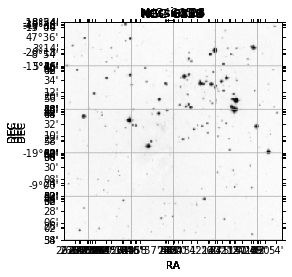

In [18]:
for line in trunctable:
    cur_targ = FixedTarget(name=line['OBJ'], coord=SkyCoord(
        line['RA'], line['Dec'], frame='icrs'))
    ax, hdu = plot_finder_image(cur_targ)
    hdu.writeto(subdir+'\\'+line['OBJ']+'.fits')